In [6]:
# Import library umum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# TensorFlow untuk konversi model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [8]:
# Load dataset
df = pd.read_csv("/content/sample_data/Healthcare_Risk.csv")

# Lihat 5 data pertama
df.head()


,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [9]:
# Cek informasi dataset
df.info()

# Cek missing values
print("\nMissing Values per kolom:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

In [10]:
# Hapus kolom yang tidak berguna
df = df.drop(columns=["random_notes", "noise_col"], errors="ignore")

# Isi missing value numerik dengan mean
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Isi missing value kategorikal dengan modus
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Jumlah missing values setelah cleaning:", df.isnull().sum().sum())


Jumlah missing values setelah cleaning: 0


In [11]:
# Encode Gender dan Medical Condition
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])

le_medical = LabelEncoder()
df["Medical Condition"] = le_medical.fit_transform(df["Medical Condition"])

print("Mapping Gender:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))
print("Mapping Medical Condition:", dict(zip(le_medical.classes_, le_medical.transform(le_medical.classes_))))


Mapping Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Mapping Medical Condition: {'Arthritis': np.int64(0), 'Asthma': np.int64(1), 'Cancer': np.int64(2), 'Diabetes': np.int64(3), 'Healthy': np.int64(4), 'Hypertension': np.int64(5), 'Obesity': np.int64(6)}


In [12]:
X = df.drop(columns=["Medical Condition"])
y = df["Medical Condition"]

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Inisialisasi dan latih model
rf = RandomForestClassifier(
    n_estimators=150,
    random_state=42,
    max_depth=10,
    class_weight="balanced"
)
rf.fit(X_train_scaled, y_train)

# Evaluasi
y_pred = rf.predict(X_test_scaled)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=le_medical.classes_))


Akurasi: 0.7806666666666666

Laporan Klasifikasi:
              precision    recall  f1-score   support

   Arthritis       0.39      0.89      0.54       359
      Asthma       0.74      0.93      0.83       407
      Cancer       0.78      0.99      0.87       247
    Diabetes       0.83      0.93      0.88      1283
     Healthy       0.85      0.99      0.92       608
Hypertension       0.96      0.56      0.70      2324
     Obesity       0.76      0.85      0.80       772

    accuracy                           0.78      6000
   macro avg       0.76      0.88      0.79      6000
weighted avg       0.84      0.78      0.78      6000



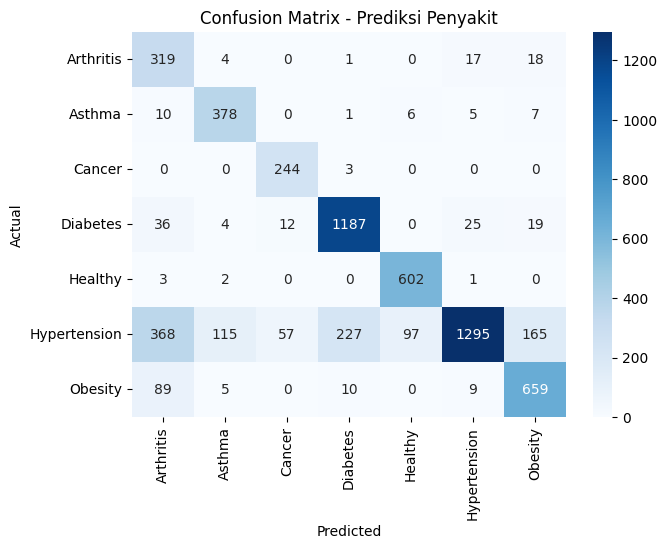

In [15]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le_medical.classes_, yticklabels=le_medical.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Prediksi Penyakit")
plt.show()


In [16]:
# Gunakan prediksi dari model Random Forest sebagai target soft
rf_probs = rf.predict_proba(X_train_scaled)

# Buat model neural network kecil dengan output sama dengan jumlah kelas penyakit
num_features = X_train_scaled.shape[1]
num_classes = len(np.unique(y_train))

nn_model = keras.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Latih model berdasarkan label asli (y_train)
nn_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=1)

# Simpan model
nn_model.save("health_model.h5")

# Konversi ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(nn_model)
tflite_model = converter.convert()

with open("health_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model TFLite berhasil dibuat ✅ -> health_model.tflite")


Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6805 - loss: 0.9219
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8017 - loss: 0.5375
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8070 - loss: 0.5161
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8118 - loss: 0.5017
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8156 - loss: 0.4978
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8168 - loss: 0.4901
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8179 - loss: 0.4829
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8207 - loss: 0.4796
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8214 - loss: 0.4774
Epoch 10/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8190 - loss: 0.4743
Epoch 11/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8200 - loss: 0.4709
Epoch 12/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Saved artifact at '/tmp/tmp3a6f98mc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 17), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  140024788545232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140024788546384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140024788545040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140024788542544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140024788546960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140024788543888: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model TFLite berhasil dibuat ✅ -> health_model.tflite


In [17]:
# Simulasi input user
user_input = {
    "Age": 45,
    "Gender": "Male",
    "Glucose": 150,
    "Blood Pressure": 130,
    "BMI": 29,
    "Oxygen Saturation": 97,
    "LengthOfStay": 3,
    "Cholesterol": 210,
    "Triglycerides": 180,
    "HbA1c": 6.5,
    "Smoking": 1,
    "Alcohol": 0,
    "Physical Activity": 2,
    "Diet Score": 5,
    "Family History": 1,
    "Stress Level": 7,
    "Sleep Hours": 6
}

# Convert ke DataFrame
input_df = pd.DataFrame([user_input])

# Encode Gender
input_df["Gender"] = le_gender.transform(input_df["Gender"])

# Urutkan kolom sesuai X_train
input_df = input_df[X.columns]

# Normalisasi
input_scaled = scaler.transform(input_df)

# Prediksi
pred = rf.predict(input_scaled)[0]
pred_class = le_medical.inverse_transform([pred])[0]

print("Prediksi kondisi medis pengguna:", pred_class)


Prediksi kondisi medis pengguna: Diabetes


In [18]:
# Load model TFLite
interpreter = tf.lite.Interpreter(model_path="health_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Uji input user (numpy)
interpreter.set_tensor(input_details[0]['index'], np.array(input_scaled, dtype=np.float32))
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
pred_tflite = np.argmax(output_data)
pred_label_tflite = le_medical.inverse_transform([pred_tflite])[0]

print("Prediksi (via TFLite):", pred_label_tflite)


Prediksi (via TFLite): Diabetes


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
